<a href="https://colab.research.google.com/github/KodumuruRaja/Dimensionality-Reduction-Algorithms/blob/main/Sammon-Mapping2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
stoplist = set(stopwords.words('english'))


class SammonMapping():
    def __init__(self, vectors):
        """
        :param vectors: input vectors as numpy darray which is to be reduced to desired dimension.
        """
        self.vectors = vectors
        self.magic_factor = 0.4

        self.threshold = 1e-5
        self.new_vector = PCA(n_components=2).fit_transform(self.vectors)
        self.error = 1.0
        self.error_old = 2.0
        self.distance_old_vector = self.distance_vector(self.vectors)
        self.distance_new_vector = self.distance_vector(self.new_vector)
        self.difference_new_vector = self.subtract_vector()
        self.c = self.calculate_c()

    def error_calculate(self):
        """
        :return: error value of distance between all old vectors and distance between all new vectors
        """
        result = np.triu(
            np.nan_to_num((((self.distance_old_vector - self.distance_new_vector) ** 2) / self.distance_old_vector)),
            k=1)
        sum = result.sum()

        return sum * (1 / self.c)

    def calculate_c(self):
        """
        :return: calculated value of c
        """

        c = np.triu(self.distance_old_vector, k=1)
        sum = 0
        for i in range(self.distance_old_vector.shape[0]):
            another_sum = 0
            for x in c[i]:
                another_sum = another_sum + x
            sum += another_sum
        return sum

    def first_differentiate(self, index):
        """
         :param index: index of vector with respect to which first differentiation is to be done
        :return: a vector with desired value of first differentiation with respect to input vector.
        """

        first_term = np.nan_to_num(np.divide((self.distance_old_vector[index] - self.distance_new_vector[index]), (
            np.multiply(self.distance_old_vector[index], self.distance_new_vector[index]))))
        first_term_populated = np.array([first_term.T] * 2).T
        final_value = np.multiply(first_term_populated, self.difference_new_vector[index])
        summed = final_value.sum(axis=0)

        return (-2 * summed) / self.c

    def second_differentiate(self, index):
        """
        :param index: index of vector with respect to which second differentiation is to be done
        :return: a vector with desired value of second differentiation with respect to input vector.
        """

        first = self.distance_old_vector[index] - self.distance_new_vector[index]
        first_populated = np.array([(self.distance_old_vector[index] - self.distance_new_vector[index]).T] * 2).T
        second = np.array([np.multiply(self.distance_old_vector[index], self.distance_new_vector[index]).T] * 2).T
        third = np.nan_to_num(np.divide(np.square(self.difference_new_vector[index]),
                                        np.array([self.distance_new_vector[index].T] * 2).T))
        e = np.array([(1 + np.nan_to_num(np.divide(first, self.distance_new_vector[index]))).T] * 2).T
        ans = np.nan_to_num(np.divide((first_populated - np.multiply(third, e)), second))
        arg1 = ans.sum(axis=0)

        answer = (-2 * arg1) / self.c
        return answer

    def distance_vector(self, vector):
        """
        :param vector: ndarray which contains numbers of vectors and whose distance with each other is to be calculated.
        :return: a ndarray containing distance between every vectors with each other
        """

        d = (vector ** 2).sum(axis=-1)[:, np.newaxis] + (vector ** 2).sum(axis=-1)
        d -= 2 * np.squeeze(vector.dot(vector[..., np.newaxis]), axis=-1)
        d **= 0.5
        return d

    def subtract_vector(self):

        """
        :return: a n * n dimensional darray of numpy each containing difference between vectors of m dimension, \
        where m is desired dimension in our case
        """
        J, P = self.new_vector.shape
        empty_vector = np.zeros(shape=[J, J, P])

        for i, x in enumerate(self.new_vector):
            next_vector = np.array([x] * J)
            intermediate_vector = next_vector - self.new_vector
            empty_vector[i] = intermediate_vector

        return empty_vector

    def get_sammon_mapped_coordinate(self):
        """
        :return: desired vector with error minimized
        """
        while abs(self.error_old - self.error) > self.threshold:
            for index, new in enumerate(self.new_vector):
                first = self.first_differentiate(index)
                second = self.second_differentiate(index)
                delta = self.magic_factor * first / second

                self.new_vector[index] -= delta
                self.distance_new_vector = self.distance_vector(self.new_vector)
                self.difference_new_vector = self.subtract_vector()
            self.error_old = self.error
            self.error = self.error_calculate()
            print(self.error)
        return self.new_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-package

184.35529194569284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in multiply


66.1929613328184
45.088703921374496
16.400279831190122
7.786928979512528
4.249691381807668
17.881740088468806
7.520828159955721
3.765069427010957
2.4054821455116926
1.9041069803652484
1.7225901437204427
1.665441363176757
1.6528870852330664
1.6496460689446042
1.6479666603078853
1.6467417149305525
1.6461618506226445
1.6459296378702215
1.645818307209617
1.6457755825280567
1.6457521661160477
1.6457389173566215
1.6457305983681445
0:01:20.771696


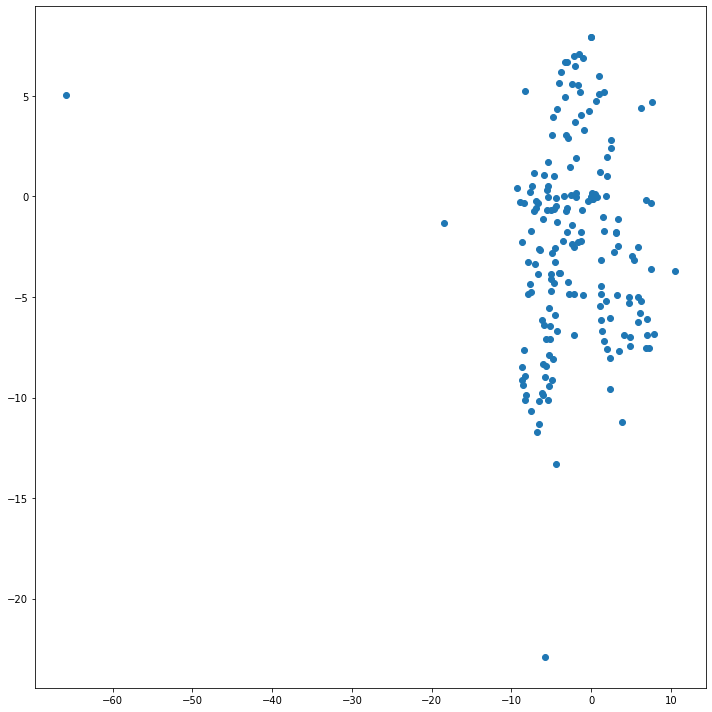

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
h = np.loadtxt('/content/bouquet_of_circles.txt', dtype= 'f')

import datetime
a = datetime.datetime.now()
sm = SammonMapping(h)
X = sm.get_sammon_mapped_coordinate()
b = datetime.datetime.now()
print(b-a)

x_index = 0
y_index = 1
plt.figure(figsize=(10, 10))
plt.scatter(X[:, x_index], X[:, y_index])

plt.tight_layout()
plt.show()